In [1]:
# Copyright (C) 2020. Huawei Technologies Co., Ltd. All rights reserved.

# This program is free software; you can redistribute it and/or modify it under
# the terms of the MIT license.

# This program is distributed in the hope that it will be useful, but WITHOUT ANY
# WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A
# PARTICULAR PURPOSE. See the MIT License for more details.

# High-dimensional optimisation via random linear embedding

We combine the linear-embedding strategy with HEBO, and show that it can be used to solve problems with low intrinsic dimensions

In [2]:
import matplotlib.pyplot as plt
from hebo.benchmarks.synthetic_benchmarks import BraninDummy
import pandas as pd
import numpy  as np
import torch

from hebo.optimizers.hebo_embedding import HEBO_Embedding
from hebo.design_space.design_space import DesignSpace

In [3]:
prob  = BraninDummy(1000) # 1000-D Branin function where the frist two dimensions are active
opt   = HEBO_Embedding(prob.space, rand_sample = 10, eff_dim = 2, scale = 1)

Best value is 0.000


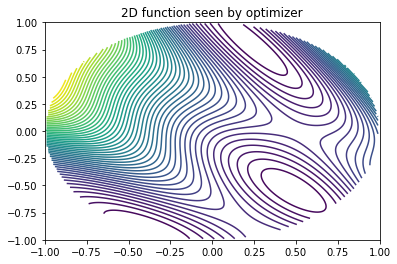

In [4]:
def f(x : np.ndarray, y : np.ndarray):
    data = pd.DataFrame(np.hstack([x.reshape(-1,1), y.reshape(-1,1)]),columns = opt.eff_space.numeric_names)
    x_hd = opt.project(data)
    valid = (x_hd.abs() < 1).all(axis = 1).values.reshape(-1)
    f    = prob(x_hd).reshape(-1)
    f[~valid] = np.nan
    return f

x = np.linspace(-1*opt.scale,1*opt.scale,200)
y = np.linspace(-1*opt.scale,1*opt.scale,200)

if opt.eff_dim == 2:
    X,Y = np.meshgrid(x,y)
    Z   = f(X,Y).reshape(200,200)
    plt.contour(X, Y, Z, 50);
    plt.title('2D function seen by optimizer')
    print('Best value is %.3f' % Z[np.isfinite(Z)].min())

In [5]:
for i in range(16):
    rec   = opt.suggest(8)
    rec_h = opt.project(rec) 
    y     = prob(rec_h) # optimizer return points in embedding space
    opt.observe(rec,y)
    print('Iter %d, y = %.2f, best_y = %.2f' % (i, y.min(), opt.mace.y.min()))

Iter 0, y = 13.40, best_y = 13.40
Iter 1, y = 0.80, best_y = 0.80
Iter 2, y = 5.58, best_y = 0.80
Iter 3, y = 0.09, best_y = 0.09
Iter 4, y = 0.01, best_y = 0.01
Iter 5, y = 0.08, best_y = 0.01
Iter 6, y = 0.00, best_y = 0.00
Iter 7, y = 0.00, best_y = 0.00
Iter 8, y = 0.00, best_y = 0.00
Iter 9, y = 0.00, best_y = 0.00
Iter 10, y = 0.00, best_y = 0.00
Iter 11, y = 0.00, best_y = 0.00
Iter 12, y = 0.00, best_y = 0.00
Iter 13, y = 0.00, best_y = 0.00
Iter 14, y = 0.00, best_y = 0.00
Iter 15, y = 0.00, best_y = 0.00


Text(0, 0.5, 'Regret')

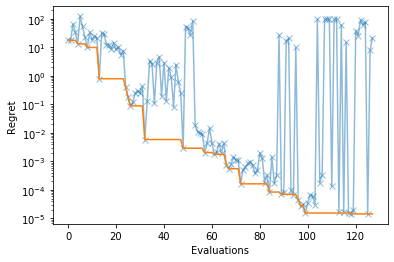

In [6]:
plt.semilogy(opt.mace.y, 'x-',alpha = 0.5)
plt.semilogy(np.minimum.accumulate(opt.mace.y))
plt.xlabel('Evaluations')
plt.ylabel('Regret')

Text(0.5, 1.0, 'All sampled points')

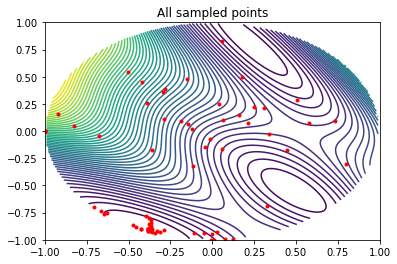

In [8]:
plt.contour(X, Y, Z, 50)
plt.plot(opt.mace.X.iloc[:,0], opt.mace.X.iloc[:,1], 'r.')
plt.title('All sampled points')